In [58]:
# load necessary libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from math import *

In [59]:
# load dataset
df=pd.read_csv("SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [60]:
# sharpe of data set
df.shape

(9994, 13)

In [61]:
# finding last rows
df.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [62]:
#information on data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [63]:
# missing values
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [64]:
#sum of all duplicates
df.duplicated().sum()

17

In [65]:
#number of duplicates
[df.duplicated(keep='last')]

[0       False
 1       False
 2       False
 3       False
 4       False
         ...  
 9989    False
 9990    False
 9991    False
 9992    False
 9993    False
 Length: 9994, dtype: bool]

In [66]:
#finding duplicates
df[df.duplicated(keep='last')]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
568,Standard Class,Corporate,United States,Seattle,Washington,98105,West,Office Supplies,Paper,19.440,3,0.0,9.3312
591,Standard Class,Consumer,United States,Salem,Oregon,97301,West,Office Supplies,Paper,10.368,2,0.2,3.6288
935,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
1186,Standard Class,Corporate,United States,Seattle,Washington,98103,West,Office Supplies,Paper,25.920,4,0.0,12.4416
1479,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,25.920,4,0.0,12.4416
2803,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,12.840,3,0.0,5.7780
2807,Second Class,Consumer,United States,Seattle,Washington,98115,West,Office Supplies,Paper,12.960,2,0.0,6.2208
2836,Standard Class,Consumer,United States,Los Angeles,California,90036,West,Office Supplies,Paper,19.440,3,0.0,9.3312
3127,Standard Class,Consumer,United States,New York City,New York,10011,East,Office Supplies,Paper,49.120,4,0.0,23.0864
3405,Standard Class,Home Office,United States,Columbus,Ohio,43229,East,Furniture,Chairs,281.372,2,0.3,-12.0588


In [71]:
category_analysis = pd.DataFrame(df.groupby(['Category'])[['Sales', 'Profit','Discount','Quantity']].sum())
category_analysis

,Sales,Profit,Discount,Quantity
Category,,,,
Furniture,741999.7953,18451.2728,368.89,8028
Office Supplies,719047.0320,122490.8008,947.80,22906
Technology,836154.0330,145454.9481,244.40,6939


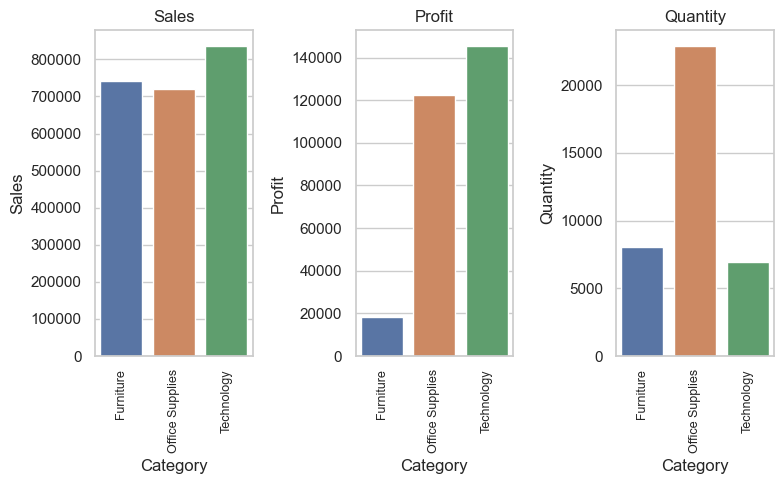

In [72]:
sns.set_theme(style="whitegrid")
figure, axis = plt.subplots(1, 3, figsize=(8, 5))
# Plot barplots
cat1 = sns.barplot(x = category_analysis.index, y = category_analysis.Sales, ax=axis[0])
cat2 = sns.barplot(x = category_analysis.index, y = category_analysis.Profit, ax=axis[1])
cat3 = sns.barplot(x = category_analysis.index, y = category_analysis.Quantity, ax=axis[2])
# Set titles
cat1.set(title = 'Sales')
cat2.set(title = 'Profit')
cat3.set(title = 'Quantity')
# Rotate axis for x-axis
plt.setp(cat1.get_xticklabels(), rotation = 'vertical', size = 9)
plt.setp(cat2.get_xticklabels(), rotation = 'vertical', size = 9)
plt.setp(cat3.get_xticklabels(), rotation = 'vertical', size = 9)
# Set spacing between subplots
figure.tight_layout()

In [74]:
subcat_profit = pd.DataFrame(category_analysis.sort_values('Profit', ascending = False))
subcat_profit

,Sales,Profit,Discount,Quantity
Category,,,,
Technology,836154.0330,145454.9481,244.40,6939
Office Supplies,719047.0320,122490.8008,947.80,22906
Furniture,741999.7953,18451.2728,368.89,8028


In [79]:
subcat_analysis = pd.DataFrame(df.groupby(['Sub-Category'])[['Sales', 'Profit']].sum())

# Sort by descending order according to sales
subcat_sales = pd.DataFrame(subcat_analysis.sort_values('Sales', ascending = False))
subcat_sales

,Sales,Profit
Sub-Category,,
Phones,330007.0540,44515.7306
Chairs,328449.1030,26590.1663
Storage,223843.6080,21278.8264
Tables,206965.5320,-17725.4811
Binders,203412.7330,30221.7633
Machines,189238.6310,3384.7569
Accessories,167380.3180,41936.6357
Copiers,149528.0300,55617.8249
Bookcases,114879.9963,-3472.5560


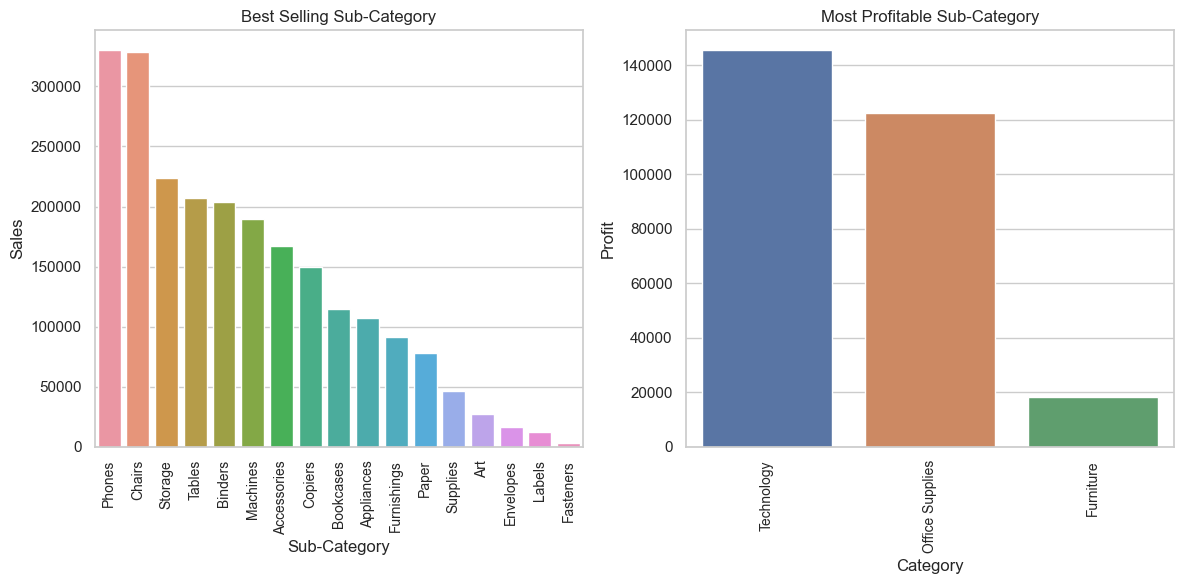

In [83]:
sns.set_theme(style="whitegrid")
# Set for grouped plots - figure with a 1x2 grid of Axes
figure, axis = plt.subplots(1, 2, figsize=(12, 6))
# Plot Bar
# Plot Bar Plot for Best Selling Sub-Category
subcat1 = sns.barplot(data = subcat_sales, x = subcat_sales.index, y = subcat_sales.Sales, ax=axis[0])
subcat1.set(title="Best Selling Sub-Category")
subcat1.set_xticklabels(subcat1.get_xticklabels(),rotation = "vertical", size = 10)
# Plot Bar Plot for Most Profitable Sub-Category
subcat2 = sns.barplot(data = subcat_profit, x = subcat_profit.index, y = subcat_profit.Profit, ax=axis[1])
subcat2.set(title = "Most Profitable Sub-Category")
subcat2.set_xticklabels(subcat2.get_xticklabels(),rotation = "vertical", size = 10)
# Set spacing between subplots
figure.tight_layout()
plt.show()

In [88]:
subcat_quantity = pd.DataFrame(df.groupby(['Sub-Category'])[['Quantity']].sum().sort_values('Quantity',ascending=False))
subcat_quantity

,Quantity
Sub-Category,
Binders,5974
Paper,5178
Furnishings,3563
Phones,3289
Storage,3158
Art,3000
Accessories,2976
Chairs,2356
Appliances,1729


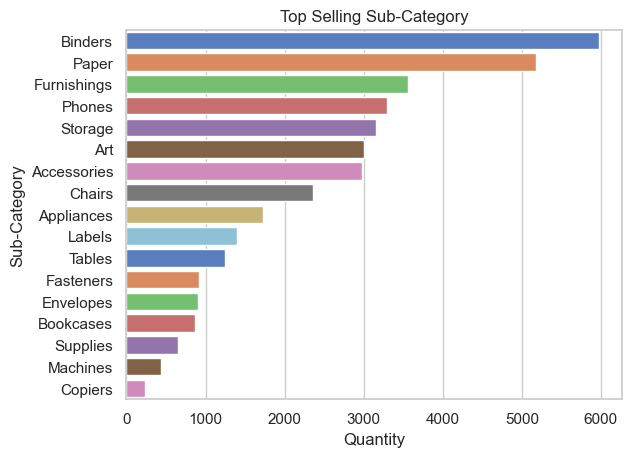

In [90]:
sns.set_theme(style="whitegrid")
sns.barplot(data = subcat_quantity, y = subcat_quantity.index, x = subcat_quantity.Quantity, palette = "muted")
plt.title("Top Selling Sub-Category")
plt.show()

In [91]:
segment_analysis = pd.DataFrame(df.groupby(['Segment'])[['Profit']].sum())
segment_analysis

,Profit
Segment,
Consumer,134119.2092
Corporate,91979.1340
Home Office,60298.6785


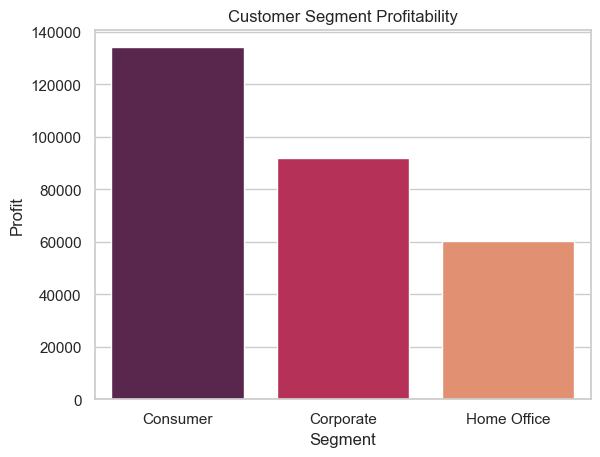

In [93]:
#Plot Bar Plot
sns.set_theme(style="whitegrid")
sns.barplot(data = segment_analysis, x = segment_analysis.index, y = segment_analysis.Profit, palette = "rocket")
plt.title("Customer Segment Profitability")
plt.show()

In [94]:
region_analysis = pd.DataFrame(df.groupby(['Region'])['Profit'].sum().reset_index())
region_analysis

,Region,Profit
0,Central,39706.3625
1,East,91522.7800
2,South,46749.4303
3,West,108418.4489


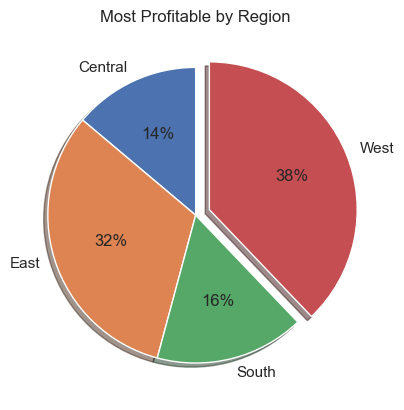

In [95]:
# Plot Pie Chart
explode = [0, 0, 0, 0.1]
plt.pie(region_analysis.Profit, labels = region_analysis.Region, startangle = 90, autopct = "%1.0f%%", explode = explode, shadow = True)
plt.title("Most Profitable by Region")
plt.show()

In [99]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [100]:
print(df['Category'].unique())

['Furniture' 'Office Supplies' 'Technology']


In [101]:
print(df['State'].unique())

['Kentucky' 'California' 'Florida' 'North Carolina' 'Washington' 'Texas'
 'Wisconsin' 'Utah' 'Nebraska' 'Pennsylvania' 'Illinois' 'Minnesota'
 'Michigan' 'Delaware' 'Indiana' 'New York' 'Arizona' 'Virginia'
 'Tennessee' 'Alabama' 'South Carolina' 'Oregon' 'Colorado' 'Iowa' 'Ohio'
 'Missouri' 'Oklahoma' 'New Mexico' 'Louisiana' 'Connecticut' 'New Jersey'
 'Massachusetts' 'Georgia' 'Nevada' 'Rhode Island' 'Mississippi'
 'Arkansas' 'Montana' 'New Hampshire' 'Maryland' 'District of Columbia'
 'Kansas' 'Vermont' 'Maine' 'South Dakota' 'Idaho' 'North Dakota'
 'Wyoming' 'West Virginia']


In [102]:
df['Segment'].value_counts()

Segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: count, dtype: int64

In [103]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [117]:
df[df['Profit']<0]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
14,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Appliances,68.8100,5,0.80,-123.8580
15,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Binders,2.5440,3,0.80,-3.8160
23,Second Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Chairs,71.3720,2,0.30,-1.0196
27,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Bookcases,3083.4300,7,0.50,-1665.0522
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9920,Standard Class,Corporate,United States,Bryan,Texas,77803,Central,Office Supplies,Binders,22.3860,7,0.80,-35.8176
9921,Standard Class,Home Office,United States,Akron,Ohio,44312,East,Office Supplies,Binders,5.7420,3,0.70,-4.5936
9931,Standard Class,Consumer,United States,San Bernardino,California,92404,West,Furniture,Bookcases,683.3320,4,0.15,-40.1960
9937,Second Class,Corporate,United States,Los Angeles,California,90049,West,Furniture,Tables,71.0880,2,0.20,-1.7772


In [137]:
loss_df['Sub-Category'].value_counts()

Sub-Category
Binders        613
Chairs         235
Tables         203
Furnishings    167
Storage        161
Phones         136
Bookcases      109
Accessories     91
Appliances      67
Machines        44
Supplies        33
Fasteners       12
Name: count, dtype: int64

In [139]:
loss_df.groupby(by='Sub-Category').sum()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sales,Quantity,Discount,Profit
Sub-Category,,,,,,,,,,,,
Accessories,Standard ClassStandard ClassStandard ClassStan...,Home OfficeConsumerHome OfficeConsumerConsumer...,United StatesUnited StatesUnited StatesUnited ...,ChicagoAuroraTampaTucsonPembroke PinesJacksonv...,IllinoisColoradoFloridaArizonaFloridaFloridaOh...,5286382,CentralWestSouthWestSouthSouthEastCentralWestW...,TechnologyTechnologyTechnologyTechnologyTechno...,10958.8000,330,18.20,-930.6265
Appliances,Standard ClassStandard ClassStandard ClassSeco...,Home OfficeConsumerCorporateConsumerConsumerCo...,United StatesUnited StatesUnited StatesUnited ...,Fort WorthSan AntonioChicagoHoustonDallasPasad...,TexasTexasIllinoisTexasTexasTexasTexasTexasIll...,4825871,CentralCentralCentralCentralCentralCentralCent...,Office SuppliesOffice SuppliesOffice SuppliesO...,3382.5340,235,53.60,-8629.6412
Binders,Standard ClassStandard ClassStandard ClassFirs...,Home OfficeConsumerConsumerCorporateHome Offic...,United StatesUnited StatesUnited StatesUnited ...,Fort WorthPhiladelphiaPhiladelphiaHoustonPortl...,TexasPennsylvaniaPennsylvaniaTexasOregonIllino...,32609300,CentralEastEastCentralWestCentralWestSouthWest...,Office SuppliesOffice SuppliesOffice SuppliesO...,36140.6130,2456,452.40,-38510.4964
Bookcases,Standard ClassStandard ClassStandard ClassSeco...,ConsumerHome OfficeCorporateHome OfficeConsume...,United StatesUnited StatesUnited StatesUnited ...,PhiladelphiaHoustonMedinaColumbusNew York City...,PennsylvaniaTexasOhioOhioNew YorkTexasTexasCal...,6423506,EastCentralEastEastEastCentralCentralWestEastE...,FurnitureFurnitureFurnitureFurnitureFurnitureF...,48072.7408,422,37.99,-12152.2060
Chairs,Second ClassStandard ClassStandard ClassStanda...,ConsumerHome OfficeHome OfficeConsumerHome Off...,United StatesUnited StatesUnited StatesUnited ...,PhiladelphiaHoustonChicagoMemphisHoustonLos An...,PennsylvaniaTexasIllinoisTennesseeTexasCalifor...,15008025,EastCentralCentralSouthCentralWestCentralEastS...,FurnitureFurnitureFurnitureFurnitureFurnitureF...,91988.4560,876,61.40,-9880.8413
Fasteners,Standard ClassFirst ClassStandard ClassStandar...,CorporateHome OfficeHome OfficeConsumerCorpora...,United StatesUnited StatesUnited StatesUnited ...,ToledoPhiladelphiaSpringfieldPhiladelphiaPhila...,OhioPennsylvaniaOregonPennsylvaniaPennsylvania...,701930,EastEastWestEastEastWestWestEastWestCentralCen...,Office SuppliesOffice SuppliesOffice SuppliesO...,149.2800,55,2.40,-33.1952
Furnishings,First ClassFirst ClassSecond ClassStandard Cla...,CorporateCorporateConsumerConsumerConsumerCons...,United StatesUnited StatesUnited StatesUnited ...,RichardsonHoustonHoustonAuroraChicagoChicagoCh...,TexasTexasTexasColoradoIllinoisIllinoisIllinoi...,10970913,CentralCentralCentralWestCentralCentralCentral...,FurnitureFurnitureFurnitureFurnitureFurnitureF...,12845.8440,597,88.60,-6490.9134
Machines,Standard ClassStandard ClassFirst ClassSecond ...,ConsumerCorporateConsumerCorporateCorporateCor...,United StatesUnited StatesUnited StatesUnited ...,San AntonioMedinaDublinHoustonHoustonPhiladelp...,TexasOhioOhioTexasTexasPennsylvaniaNorth Carol...,2236261,CentralEastEastCentralCentralEastSouthSouthSou...,TechnologyTechnologyTechnologyTechnologyTechno...,72456.2530,157,25.60,-30118.6682
Phones,First ClassStandard ClassFirst ClassSecond Cla...,CorporateCorporateConsumerConsumerConsumerCons...,United StatesUnited StatesUnited StatesUnited ...,ColumbusMedinaPhiladelphiaPhiladelphiaLos Ange...,OhioOhioPennsylvaniaPennsylvaniaCaliforniaOreg...,6105294,EastEastEastEastWestWestEastEastEastEastEastEa...,TechnologyTechnologyTechnologyTechnologyTechno...,35797.8400,476,46.60,-7530.6235


In [140]:
loss_df.groupby(by='Segment').sum()

,Ship Mode,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
Segment,,,,,,,,,,,,
Consumer,Standard ClassSecond ClassStandard ClassStanda...,United StatesUnited StatesUnited StatesUnited ...,Fort LauderdalePhiladelphiaPhiladelphiaPhilade...,FloridaPennsylvaniaPennsylvaniaPennsylvaniaPen...,57202260,SouthEastEastEastEastSouthSouthCentralWestWest...,FurnitureFurnitureFurnitureOffice SuppliesOffi...,TablesChairsBookcasesBindersBindersChairsStora...,247196.2460,3651,476.76,-84945.7112
Corporate,First ClassFirst ClassFirst ClassStandard Clas...,United StatesUnited StatesUnited StatesUnited ...,RichardsonHoustonHoustonBristolColumbusChicago...,TexasTexasTexasTennesseeOhioIllinoisPennsylvan...,30034273,CentralCentralCentralSouthEastCentralEastEastE...,FurnitureOffice SuppliesFurnitureOffice Suppli...,FurnishingsBindersFurnishingsBindersPhonesAppl...,131860.5383,2191,272.00,-44787.2076
Home Office,Standard ClassStandard ClassStandard ClassStan...,United StatesUnited StatesUnited StatesUnited ...,Fort WorthFort WorthHoustonHoustonChicagoChica...,TexasTexasTexasTexasIllinoisIllinoisOregonIlli...,17522858,CentralCentralCentralCentralCentralCentralWest...,Office SuppliesOffice SuppliesFurnitureFurnitu...,AppliancesBindersBookcasesChairsChairsStorageB...,89650.3705,1198,150.98,-26398.3669


In [141]:
loss_df.groupby(by='Segment').sum()

,Ship Mode,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
Segment,,,,,,,,,,,,
Consumer,Standard ClassSecond ClassStandard ClassStanda...,United StatesUnited StatesUnited StatesUnited ...,Fort LauderdalePhiladelphiaPhiladelphiaPhilade...,FloridaPennsylvaniaPennsylvaniaPennsylvaniaPen...,57202260,SouthEastEastEastEastSouthSouthCentralWestWest...,FurnitureFurnitureFurnitureOffice SuppliesOffi...,TablesChairsBookcasesBindersBindersChairsStora...,247196.2460,3651,476.76,-84945.7112
Corporate,First ClassFirst ClassFirst ClassStandard Clas...,United StatesUnited StatesUnited StatesUnited ...,RichardsonHoustonHoustonBristolColumbusChicago...,TexasTexasTexasTennesseeOhioIllinoisPennsylvan...,30034273,CentralCentralCentralSouthEastCentralEastEastE...,FurnitureOffice SuppliesFurnitureOffice Suppli...,FurnishingsBindersFurnishingsBindersPhonesAppl...,131860.5383,2191,272.00,-44787.2076
Home Office,Standard ClassStandard ClassStandard ClassStan...,United StatesUnited StatesUnited StatesUnited ...,Fort WorthFort WorthHoustonHoustonChicagoChica...,TexasTexasTexasTexasIllinoisIllinoisOregonIlli...,17522858,CentralCentralCentralCentralCentralCentralWest...,Office SuppliesOffice SuppliesFurnitureFurnitu...,AppliancesBindersBookcasesChairsChairsStorageB...,89650.3705,1198,150.98,-26398.3669


In [142]:
loss_df.groupby(by='City').sum().sort_values('Profit',ascending=True).head(10)

,Ship Mode,Segment,Country,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
City,,,,,,,,,,,,
Philadelphia,Second ClassStandard ClassStandard ClassStanda...,ConsumerConsumerConsumerConsumerCorporateConsu...,United StatesUnited StatesUnited StatesUnited ...,PennsylvaniaPennsylvaniaPennsylvaniaPennsylvan...,4783713,EastEastEastEastEastEastEastEastEastEastEastEa...,FurnitureFurnitureOffice SuppliesOffice Suppli...,ChairsBookcasesBindersBindersBindersPhonesChai...,70460.5510,892,115.30,-19590.7411
Houston,Standard ClassStandard ClassFirst ClassFirst C...,Home OfficeHome OfficeCorporateCorporateConsum...,United StatesUnited StatesUnited StatesUnited ...,TexasTexasTexasTexasTexasTexasTexasTexasTexasT...,14256474,CentralCentralCentralCentralCentralCentralCent...,FurnitureFurnitureOffice SuppliesFurnitureFurn...,BookcasesChairsBindersFurnishingsFurnishingsCh...,37640.7304,683,104.14,-14785.3668
Chicago,Standard ClassFirst ClassStandard ClassStandar...,Home OfficeHome OfficeHome OfficeHome OfficeCo...,United StatesUnited StatesUnited StatesUnited ...,IllinoisIllinoisIllinoisIllinoisIllinoisIllino...,9397492,CentralCentralCentralCentralCentralCentralCent...,FurnitureOffice SuppliesTechnologyOffice Suppl...,ChairsStorageAccessoriesBindersAppliancesFurni...,19910.0120,541,88.20,-11120.6271
San Antonio,Standard ClassStandard ClassStandard ClassStan...,ConsumerConsumerConsumerConsumerCorporateCorpo...,United StatesUnited StatesUnited StatesUnited ...,TexasTexasTexasTexasTexasTexasTexasTexasTexasT...,2580831,CentralCentralCentralCentralCentralCentralCent...,TechnologyOffice SuppliesFurnitureOffice Suppl...,MachinesStorageChairsAppliancesTablesChairsBin...,17395.1450,139,17.10,-7831.0254
Lancaster,Standard ClassSecond ClassStandard ClassStanda...,CorporateHome OfficeHome OfficeConsumerConsume...,United StatesUnited StatesUnited StatesUnited ...,PennsylvaniaOhioOhioPennsylvaniaOhioPennsylvan...,683904,EastEastEastEastEastEastEastEastEastEastEastEa...,Office SuppliesFurnitureTechnologyOffice Suppl...,BindersTablesPhonesSuppliesAccessoriesBindersP...,7699.2420,71,9.40,-7632.4946
Burlington,Same DayStandard ClassStandard ClassSame Day,CorporateHome OfficeConsumerCorporate,United StatesUnited StatesUnited StatesUnited ...,North CarolinaNorth CarolinaNorth CarolinaNort...,108868,SouthSouthSouthSouth,TechnologyOffice SuppliesFurnitureFurniture,MachinesBindersTablesTables,12044.8740,19,2.00,-5999.3318
Dallas,Second ClassStandard ClassStandard ClassStanda...,ConsumerConsumerCorporateConsumerConsumerConsu...,United StatesUnited StatesUnited StatesUnited ...,TexasTexasTexasTexasTexasTexasTexasTexasTexasT...,5487794,CentralCentralCentralCentralCentralCentralCent...,Office SuppliesOffice SuppliesOffice SuppliesO...,AppliancesSuppliesStorageBindersAppliancesBind...,9994.0562,280,39.30,-4208.5218
Jacksonville,Standard ClassStandard ClassStandard ClassFirs...,ConsumerConsumerCorporateConsumerCorporateCorp...,United StatesUnited StatesUnited StatesUnited ...,FloridaFloridaFloridaFloridaNorth CarolinaNort...,1237176,SouthSouthSouthSouthSouthSouthSouthSouthSouthS...,Office SuppliesTechnologyFurnitureOffice Suppl...,BindersAccessoriesTablesBindersMachinesBinders...,31146.2710,154,18.85,-4059.9857
New York City,Standard ClassFirst ClassSame DaySame DayFirst...,ConsumerConsumerConsumerConsumerConsumerConsum...,United StatesUnited StatesUnited StatesUnited ...,New YorkNew YorkNew YorkNew YorkNew YorkNew Yo...,400828,EastEastEastEastEastEastEastEastEastEastEastEa...,FurnitureFurnitureFurnitureFurnitureFurnitureF...,BookcasesBookcasesTablesTablesTablesTablesBook...,19533.8020,132,12.20,-3966.0226


In [144]:
df.groupby(['State']).sum()['Sales'].nsmallest(10)

State
New Mexico         23.976
Connecticut       252.357
New Jersey        418.292
Delaware          510.279
West Virginia     673.344
Nevada            674.352
Maryland          789.803
New Hampshire    1053.164
Rhode Island     1758.246
Massachusetts    3275.321
Name: Sales, dtype: float64

In [145]:
df.sort_values(['Segment'],ascending=True).groupby('Segment').sum()

,Ship Mode,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
Segment,,,,,,,,,,,,
Consumer,Standard ClassFirst ClassStandard ClassStandar...,United StatesUnited StatesUnited StatesUnited ...,Fort LauderdaleEdinburgCarrolltonCarrolltonMia...,FloridaTexasTexasTexasFloridaCaliforniaNorth C...,57202260,SouthCentralCentralCentralSouthWestSouthEastCe...,FurnitureOffice SuppliesOffice SuppliesOffice ...,TablesBindersBindersAppliancesBindersChairsSto...,247196.2460,3651,476.76,-84945.7112
Corporate,First ClassSecond ClassStandard ClassStandard ...,United StatesUnited StatesUnited StatesUnited ...,PhiladelphiaSan MarcosPhiladelphiaDenverSan Ma...,PennsylvaniaTexasPennsylvaniaColoradoTexasOreg...,30034273,EastCentralEastWestCentralWestEastWestEastWest...,FurnitureOffice SuppliesTechnologyOffice Suppl...,FurnishingsStoragePhonesStorageFurnishingsBind...,131860.5383,2191,272.00,-44787.2076
Home Office,Standard ClassStandard ClassSame DayStandard C...,United StatesUnited StatesUnited StatesUnited ...,Fort WorthHendersonvilleAuroraAllentownHenders...,TexasTennesseeIllinoisPennsylvaniaTennesseeIll...,17522858,CentralSouthCentralEastSouthCentralCentralEast...,Office SuppliesOffice SuppliesFurnitureOffice ...,AppliancesBindersChairsBindersBindersBindersBo...,89650.3705,1198,150.98,-26398.3669


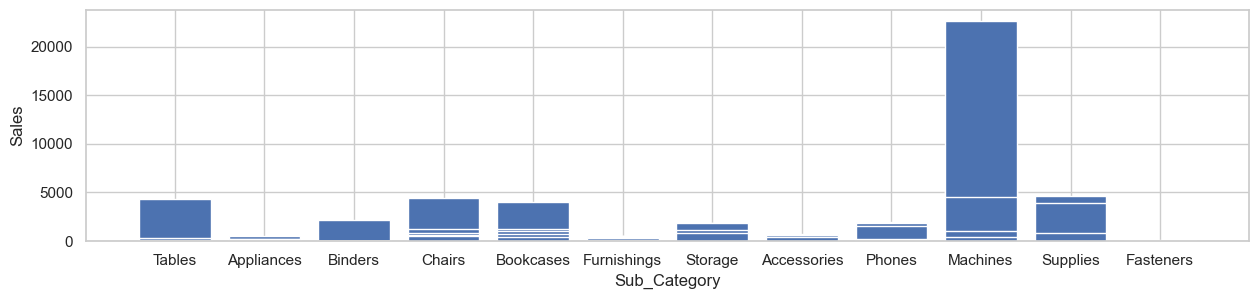

In [146]:
plt.rcParams['figure.figsize']=(15,3) 

plt.bar(loss_df['Sub-Category'],loss_df['Sales']);
plt.rcParams.update({'font.size':10});
plt.xlabel('Sub_Category');
plt.ylabel('Sales');

Text(0, 0.5, 'Discount')

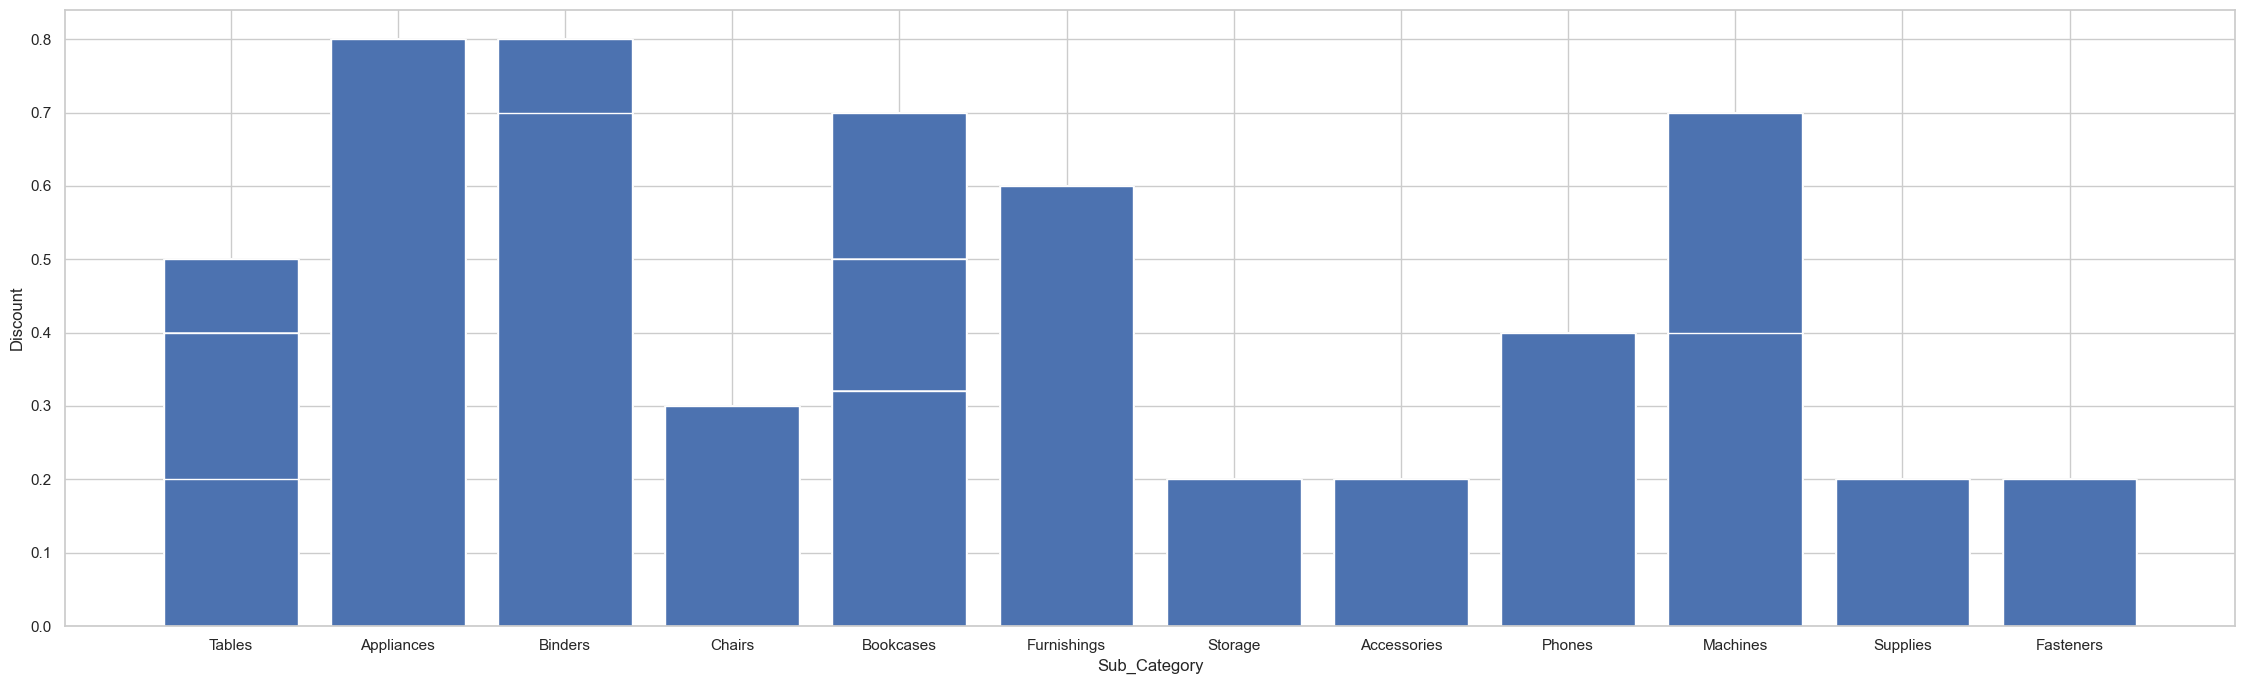

In [149]:
plt.rcParams['figure.figsize']=(28,8)
plt.bar(df['Sub-Category'],df['Discount']);
plt.rcParams.update({'font.size':14});
plt.xlabel('Sub_Category');
plt.ylabel('Discount')

Text(0, 0.5, 'Sales')

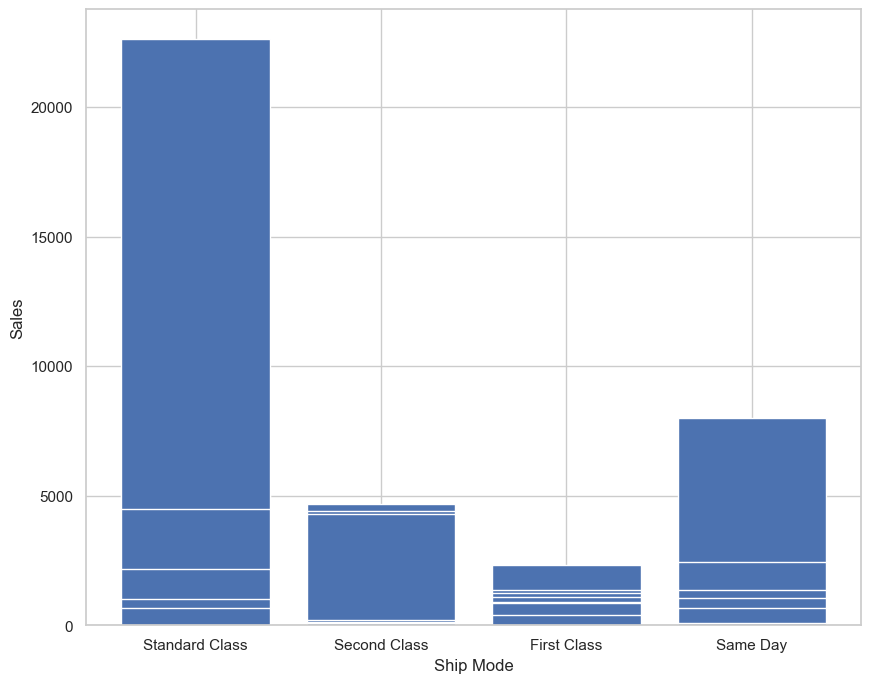

In [150]:
plt.rcParams['figure.figsize']=(10,8)
plt.bar(df['Ship Mode'],df['Sales']);
plt.rcParams.update({'font.size':14});
plt.xlabel('Ship Mode');
plt.ylabel('Sales')

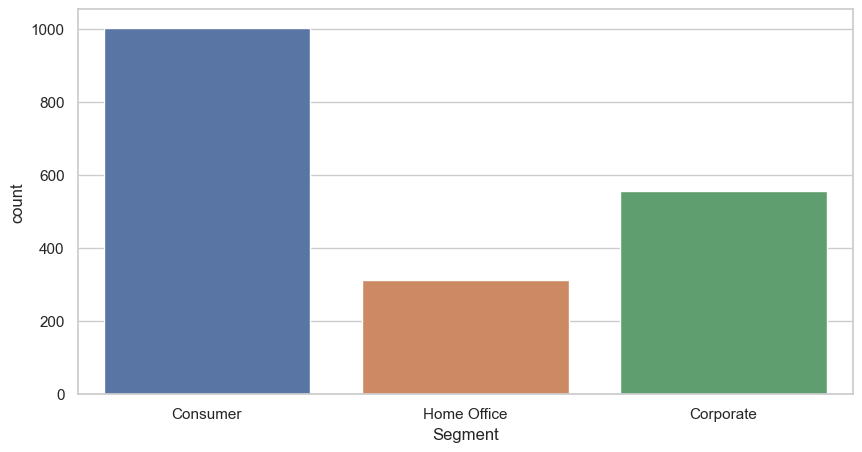

In [151]:
plt.rcParams['figure.figsize']=(10,5)
sns.countplot(x=df.Segment)
plt.show()

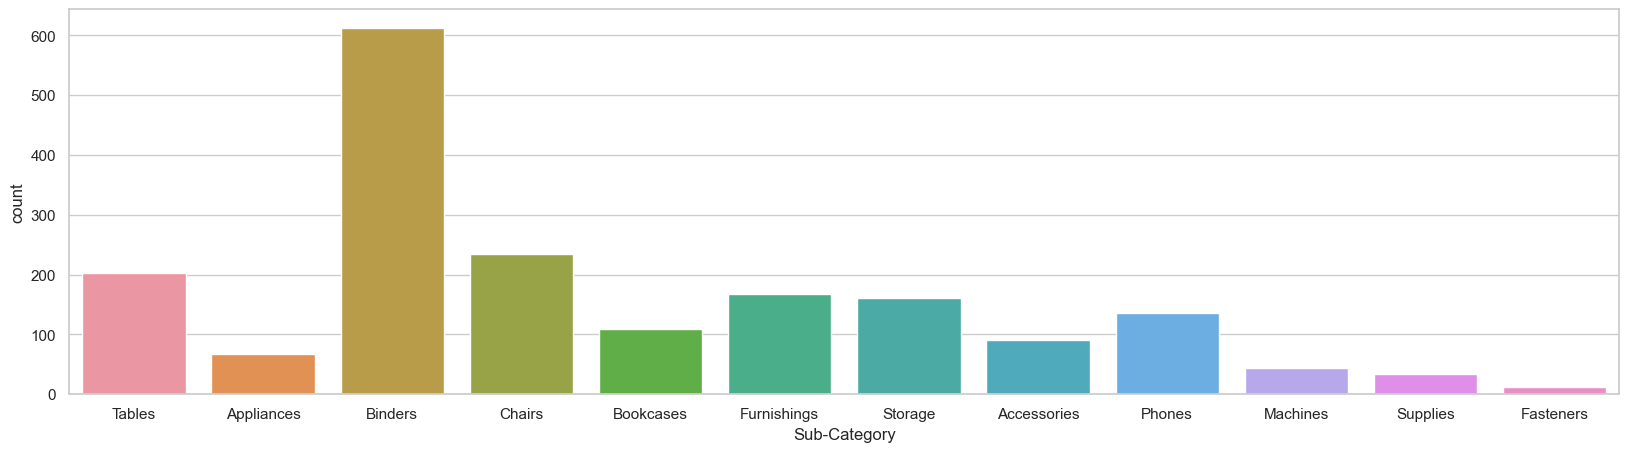

In [152]:
plt.rcParams['figure.figsize']=(20,5)
plt.rcParams.update({'font.size':12})
sns.countplot(x='Sub-Category',data=df)
plt.show()

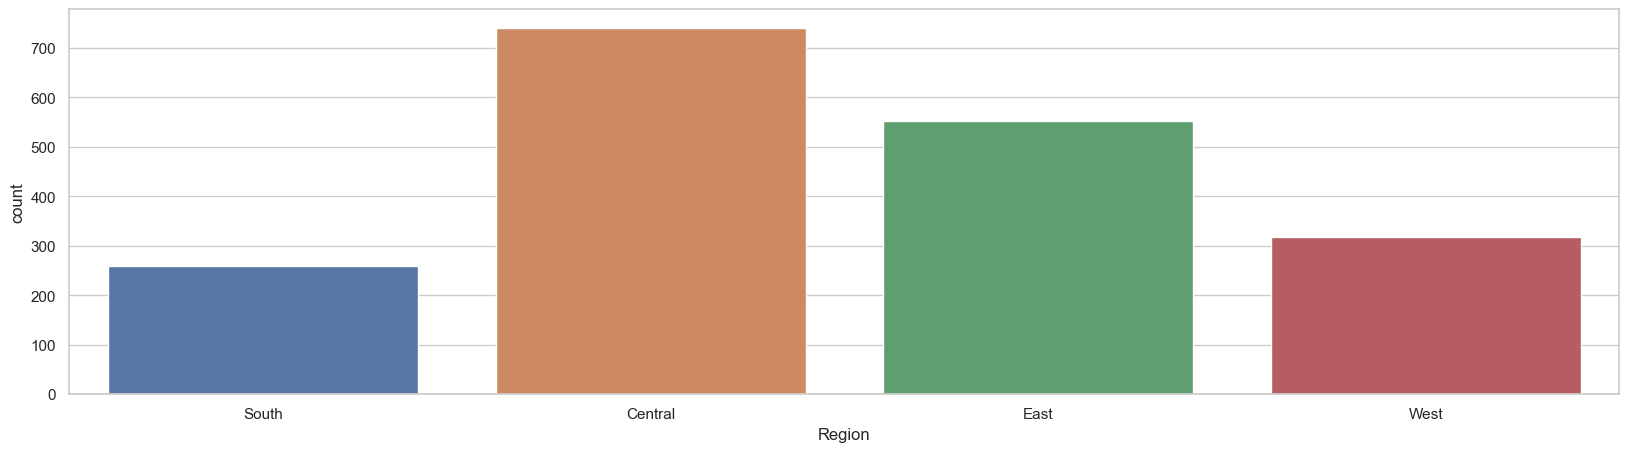

In [153]:
plt.rcParams['figure.figsize']=(20,5)
plt.rcParams.update({'font.size':12})
sns.countplot(x='Region',data=df)
plt.show()